In [3]:
import requests # Importando a biblioteca Requests
import numpy as np # Importando a biblioteca Numpy e nomeando como np
import pandas as pd # Importando a biblioteca Pandas e nomeando como pd  
from prophet import Prophet # Importando a biblioteca Prophet
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [4]:
urlApiRequest = "https://api.bcb.gov.br/dados/serie/bcdata.sgs.4189/dados?formato=json"
response = requests.get(urlApiRequest)
data = response.json()

In [5]:
df = pd.DataFrame(data)

df['Data'] = pd.to_datetime(df['data'], dayfirst=True)
df['Valor']  = df['valor'].astype(float)
df = df.drop(columns=['data', 'valor'])
df.head()

,Data,Valor
0,1986-08-01,35.55
1,1986-09-01,39.39
2,1986-10-01,23.65
3,1986-11-01,34.32
4,1986-12-01,83.98


In [ ]:
# Técnica de Análise e Modelagem
df_prophet = df.rename(columns={"Data":"ds", "Valor":'y'})

modelo = Prophet()
modelo.fit(df_prophet)

future = modelo.make_future_dataframe(periods=1095)
forecast = modelo.predict(future)

modelo.plot(forecast)

In [ ]:
forecast_renamed = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].rename(columns={
    'ds': 'DataDaPrevisao',
    'yhat': 'PrevisaoCentralTaxaSelic',
    'yhat_lower': 'LimiteInferiorPrevisao',
    'yhat_upper': 'LimiteSuperiorPrevisao'
}).to_csv("PIB.csv", index=False)

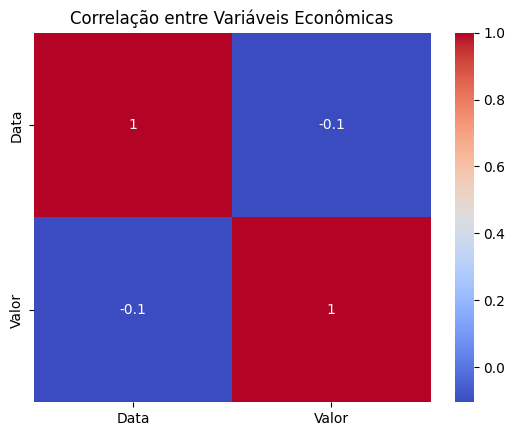

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlação entre Variáveis Econômicas")
plt.show()
